In [1]:
import numpy as np
import scipy as scip
from scipy import special
import cmath
import matplotlib as mpl
import matplotlib.pyplot as plt

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.  
    Parameters
    ----------
    width: float
    Document textwidth or columnwidth in pts
    fraction: float, optional
    Fraction of the width which you wish the figure to occupy 

    Returns
    -------
    fig_dim: tuple
    Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction 
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27 
    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2
    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in) 
    return fig_dim

In [2]:
# Plot Settings 

plt.style.use('seaborn-whitegrid')
width = 345

tex_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8
        }

mpl.rcParams.update(tex_fonts) 


## Analytical Duct Mode Solution for Uniform Flow


In [3]:
# Input Variables 
M_x     = 0.3
k       = -1 

# Compute zeros of integer-order Bessel function derivatives Jn'.
m_order = 2 #azimuthal mode

num_of_zeros = 10 # each zero corresponds to radial modes
# the first zero is radial mode 0
# the second zero is radial mode 1...

x_min   = 0
x_max   = 20
x_steps = 100
x       = np.linspace(x_min,x_max,x_steps)

In [4]:
# Bessel Function Calculation
Jv_p_zero = scip.special.jnp_zeros(n  = m_order, nt = num_of_zeros)
Jv        = scip.special.jv( m_order, x)


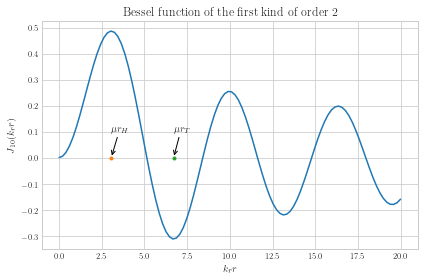

In [5]:
fig = plt.figure(
    constrained_layout=False,
#    figsize=set_size(width)
)

plt.plot(x,Jv)
plt.plot(Jv_p_zero[0],0,marker='.')
plt.plot(Jv_p_zero[1],0,marker='.')
plt.ylabel('$$ J_{10}(k_r r)$$')
plt.xlabel('$$ k_r r$$')
plt.title('Bessel function of the first kind of order ' + str(m_order))

plt.annotate('$$\mu r_H $$',
            xy=(Jv_p_zero[0],0), xycoords='data',
            xytext=(Jv_p_zero[0] ,0.1), textcoords='data',
            arrowprops=dict(
                arrowstyle="->",
                facecolor = 'black',
                 )
            )#, horizontalalignment=''
plt.annotate('$$\mu r_T $$',
            xy=(Jv_p_zero[1],0), xycoords='data',
            xytext=(Jv_p_zero[1] ,0.1), textcoords='data',
            arrowprops=dict(
                arrowstyle="->",
                facecolor = 'black',
                 )
            )#, horizontalalignment=''
plt.savefig(
    fname      ='analytical_bessel_function.pdf',
    format     ='pdf',
    bbox_inches='tight')
plt.tight_layout()
#         Jv_p_zero[1],0,marker='o')

[(0.32967032967032966+3.0072188083623743j), (0.32967032967032966+6.94351791311669j), (0.32967032967032966+10.392906899444693j), (0.32967032967032966+13.76249751269444j), (0.32967032967032966+17.101589954009697j), (0.32967032967032966+20.42555133714811j), (0.32967032967032966+23.740856399914286j), (0.32967032967032966+27.050731609410562j), (0.32967032967032966+30.35697175822134j), (0.32967032967032966+33.660656924560826j)]


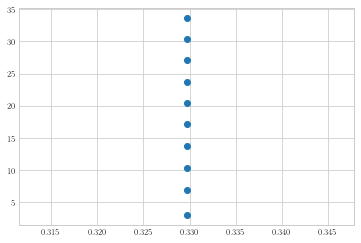

In [11]:
k_x = []
k_x_real = []
k_x_imag = []
for i,j in enumerate(Jv_p_zero):
    k_x.append(((-M_x*k + cmath.sqrt(k**2 - (1-M_x**2)*Jv_p_zero[i]**2))/(1-M_x**2)))

    k_x_real.append(k_x[i].real)
    k_x_imag.append(k_x[i].imag)
    
print(k_x)
plt.scatter(k_x_real,k_x_imag)

In [7]:

x_min   = 0
x_max   = 1 
x_steps = 100
x       = np.linspace(x_min,x_max,x_steps)

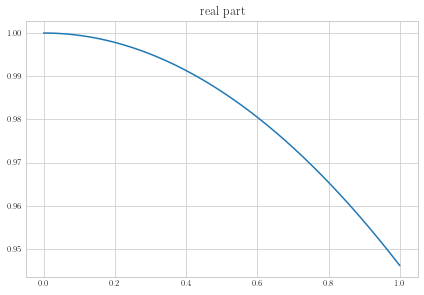

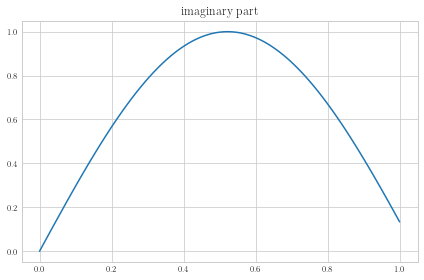

In [8]:
fig = plt.figure(
    constrained_layout=False,
#    figsize=set_size(width)
)
i = cmath.sqrt(-1)
p = []
p_real  = []
p_imag  = []
for ii in range(len(x)):
    p.append( cmath.exp(-i*k_x[0]*x[ii]))
    p_real.append( cmath.exp(i*k_x[0].real*x[ii]).real)
    p_imag.append( cmath.exp(i*k_x[0].imag*x[ii]).imag)
    
plt.plot(x,p_real[:])
plt.savefig(
    fname      ='k_x_0_re.pdf',
    format     ='pdf',
    bbox_inches='tight')
plt.tight_layout()

plt.title('real part')
fig = plt.figure(
    constrained_layout=False,
#    figsize=set_size(width)
)
plt.plot(x,p_imag[:])
plt.title('imaginary part')
plt.savefig(
    fname      ='k_x_0_im.pdf',
    format     ='pdf',
    bbox_inches='tight')
plt.tight_layout()

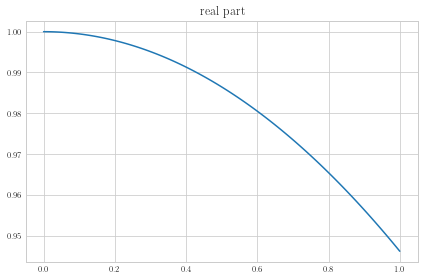

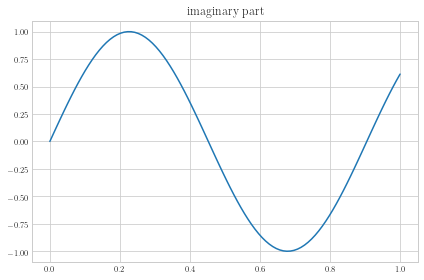

In [9]:
fig = plt.figure(
    constrained_layout=False,
#    figsize=set_size(width)
)
i = cmath.sqrt(-1)
p = []
p_real  = []
p_imag  = []
for ii in range(len(x)):
    p.append( cmath.exp(-i*k_x[0]*x[ii]))
    p_real.append( cmath.exp(i*k_x[1].real*x[ii]).real)
    p_imag.append( cmath.exp(i*k_x[1].imag*x[ii]).imag)
    
plt.plot(x,p_real[:])

plt.title('real part')
plt.savefig(
    fname      ='k_x_1_re.pdf',
    format     ='pdf',
    bbox_inches='tight')
plt.tight_layout()
fig = plt.figure(
    constrained_layout=False,
#    figsize=set_size(width)
)
plt.plot(x,p_imag[:])
plt.title('imaginary part')
plt.savefig(
    fname      ='k_x_1_im.pdf',
    format     ='pdf',
    bbox_inches='tight')
plt.tight_layout()

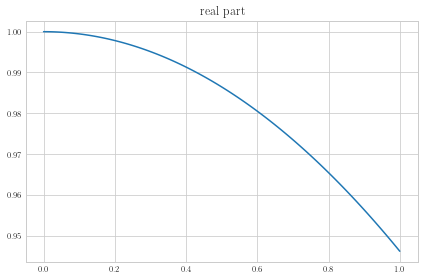

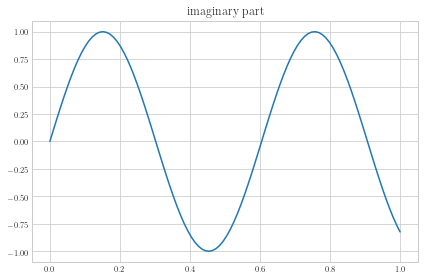

In [10]:
fig = plt.figure(
    constrained_layout=False,
#    figsize=set_size(width)
)
i = cmath.sqrt(-1)
p = []
p_real  = []
p_imag  = []
for ii in range(len(x)):
    p_real.append( cmath.exp(i*k_x[2].real*x[ii]).real)
    p_imag.append( cmath.exp(i*k_x[2].imag*x[ii]).imag)
    
plt.plot(x,p_real[:])

plt.title('real part')
plt.savefig(
    fname      ='k_x_2_re.pdf',
    format     ='pdf',
    bbox_inches='tight')
plt.tight_layout()
fig = plt.figure(
    constrained_layout=False,
#    figsize=set_size(width)
)
plt.plot(x,p_imag[:])
plt.title('imaginary part')
plt.savefig(
    fname      ='k_x_2_im.pdf',
    format     ='pdf',
    bbox_inches='tight')
plt.tight_layout()